This exercise consists of generating a random population in a limited two-dimensional Cartesian plane and, from this, randomly choosing 3 samples, 2 of which will be used to calculate the difference vector between them and the other remaining sample will be used to generate a new individual by adding its coordinates with this vector in question.


To solve this problem, the first step was to import the libraries that will be used to assist in the development of the exercise.


In [ ]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import print_cycles

After this, the function responsible for starting the population is then defined, that is, generating the individuals of the population. The function then receives the number of individuals in the population and the interval available to generate the individuals.


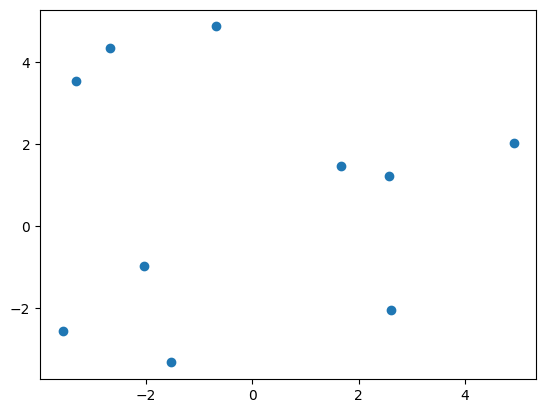

In [ ]:
def initialize_pop(N, min_val, max_val):
    pop = []
    for _ in range(N):
        individual = [rd.uniform(min_val, max_val) for _ in range(2)]
        pop.append(individual)
    return np.array(pop)

#Exemplo
pop = initialize_pop(10,-5,5)

plt.scatter(pop[:,0], pop[:,1])

Once the population has been generated, it is possible to carry out the main method of the exercise, which consists precisely of generating a new individual from the sum of the difference vector of 2 individuals in a third, below you can see the functions responsible for carrying out This task is an example of use.


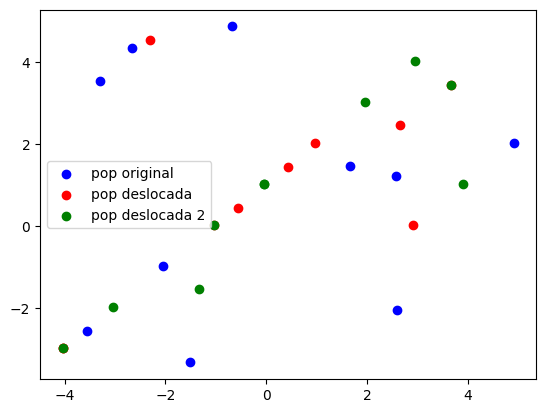

In [ ]:
def sum_indiv(pop):
  N=len(pop)
  selected = rd.sample(range(N),3)
  indiv = pop[selected[0]]
  dist = selected[1] - selected[2]
  new_indiv = indiv + dist
  if new_indiv[0] > 5 or new_indiv[0] < -5 or new_indiv[1] > 5 or new_indiv[1] < -5:
    new_indiv = sum_indiv(pop)
  return new_indiv

def move_pop(pop):
  new_pop = []
  for i in range(len(pop)):
    new_pop.append(sum_indiv(pop))
  return np.array(new_pop)

#Exemplo
new_pop=move_pop(pop)
new_new_pop = move_pop(new_pop)
plt.scatter(pop[:,0], pop[:,1], c='blue', label='pop original')
plt.scatter(new_pop[:,0], new_pop[:,1], c='red', label='pop deslocada')
plt.scatter(new_new_pop[:,0], new_new_pop[:,1], c='green', label='pop deslocada 2')
plt.legend()

In order to select the best individuals from each population, an analysis is necessary that involves the 2 dimensions of each individual, in this case x1 and x2. This exercise will be based on 2 known functions, 'Peaks' and 'Rastrigin', which will be responsible precisely for selecting x1 and x2 for each individual and based on their values ​​and a predetermined equation, calculating the Z value of each individual, value which will be used as a metric to select the best individuals


In [ ]:
def peaks(x):
    x1, x2 = x
    return -3 * (1 - x1) ** 2 * np.exp(-x1 ** 2 - (x2 + 1) ** 2) - 10 * (x1 / 5 - x1 ** 3 - x2 ** 5) * np.exp(
        -x1 ** 2 - x2 ** 2) - 1 / 3 * np.exp(-(x1 + 1) ** 2 - x2 ** 2)

def rastrigin(x):
    x1, x2 = x
    return 20 + x1 ** 2 + x2 ** 2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

The function below is only responsible for identifying which of the 2 functions above the exercise is dealing with, calling them for each individual and storing the result of each one in an array


In [ ]:
def rate_pop(pop, func):
  rated_pop = [func(sample) for sample in pop]
  return np.array(rated_pop)

#Exemplo
print(rate_pop(pop, peaks))

[ 9.19073664e-07 -1.00766981e+00  8.72660508e-08 -6.05349343e-03
 -2.47731310e-05  3.37620787e-07 -1.45929701e-02  8.25783951e-01
  8.68848119e-10  5.80506672e-02]


Once you have a well-defined metric, it is important to create a function that will select, based on the metric, the best individuals from each population and create a third population with the best


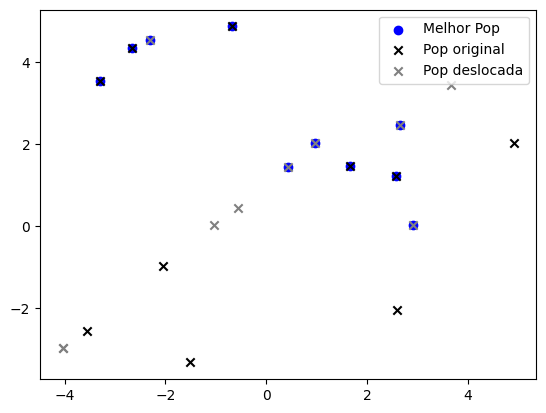

In [ ]:
def best_samples(pop, new_pop, rated_pop, rated_new):
  best_pop = []
  for i in range(len(pop)):
    if rated_pop.max() > rated_new.max():
      ind = np.argmax(rated_pop)
      best_pop.append(pop[ind].tolist())
      rated_pop[ind] = -10000
    else:
      ind = np.argmax(rated_new)
      best_pop.append(new_pop[ind].tolist())
      rated_new[ind] = -10000
  return np.array(best_pop)

#Exemplo
best_pop = best_samples(pop, new_pop, rate_pop(pop, peaks), rate_pop(new_pop, peaks))

plt.scatter(best_pop[:,0], best_pop[:,1], c='blue', label='Melhor Pop')
plt.scatter(pop[:,0], pop[:,1], c='black', marker = 'x', label='Pop original')
plt.scatter(new_pop[:,0], new_pop[:,1], c='grey', marker = 'x', label='Pop deslocada')
plt.legend()

Once all the functions have been defined, the next step is to put the program into practice, making the function calls correctly and defining the parameters that will be used to develop the exercise, such as number of individuals in the population and number of generations ( or iterations), as the program will be used twice, for the two functions 'Peaks' and 'Rastrigin', to avoid code repetition, a function called main_prog was created that receives which of the 2 functions will be used and executes the code based on it .


In [ ]:
def main_prog(func, func_name):
  mean_pops = []
  mean_best = []
  pop = initialize_pop(100, -5, 5)
  first_pop = pop
  rated_pop = rate_pop(pop, func)

  mean_pops.append(rated_pop.mean())
  mean_best.append(rated_pop.mean())

  maxitt = 500
  itt = 0

  while itt < maxitt:

    new_pop = move_pop(pop)

    rated_new = rate_pop(new_pop, func)
    mean_pops.append(rated_new.mean())

    best_pop = best_samples(pop, new_pop, rated_pop, rated_new)
    itt += 1
    pop = best_pop
    rated_pop = rate_pop(pop, func)
    mean_best.append(rated_pop.mean())


  print(mean_pops)
  print(mean_best)

  x1 = np.linspace(-5, 5, 800)
  x2 = np.linspace(-5, 5, 800)
  X1, X2 = np.meshgrid(x1, x2)

  Z = func([X1, X2])

  plt.figure(figsize=(10, 6))
  contour = plt.contourf(X1, X2, Z, levels=100, cmap='viridis')
  plt.colorbar(contour, label='Valor de f(x)')
  plt.scatter(best_pop[:, 0], best_pop[:, 1], color='red', label='Melhores Amostras', s=50)
  plt.scatter(first_pop[:,0], first_pop[:,1], color='black', label='Primeira População', marker='x')
  plt.legend()
  plt.title(f'Plot de Contorno da Função {func_name} com Melhores Amostras')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

  num_gen = range(1, len(mean_pops) + 1)

  plt.plot(num_gen, mean_pops, label='Média por Nova População')
  plt.xlabel('Novas Populações')
  plt.ylabel(f'Média da Função {func_name}')
  plt.legend()
  plt.show()

  plt.plot(num_gen, mean_best, label='Média por Geração')
  plt.xlabel('Gerações')
  plt.ylabel(f'Média da Função {func_name}')
  plt.legend()
  plt.show()

Peaks Case

[-0.21682778792420523, -0.16171642732690536, -0.25236013881803937, -0.8789871711030327, -0.4598117721102735, -0.23052382717814163, -0.3543010575297936, -0.5181271528160153, -0.702442849242738, -0.6229996133949647, -0.5103961989342839, -0.09753253923601399, -0.691159499511206, -0.5657467741540269, -0.3932438707545349, -0.8319703029004555, -0.6483214667060965, -0.676972526884876, -0.18971009685216828, -0.719897742274593, -0.38749124670599316, -0.7511939828644912, -0.4606339145485244, -0.2790456829850703, -0.41273899317123414, -0.3318792371941829, -0.7027164241100082, -0.7027213602934869, -0.3427352592529587, -0.40984143312200244, -0.7481899454980274, -0.3200248767556188, -0.3084153942302433, -0.2888783194373425, -0.24868651044939225, -0.6640380764555078, -0.1531415272243264, -0.8575265657090179, -0.5500958825853346, 0.06156541094655704, -0.47018557828130886, -0.1850942615971596, -0.3302644938461662, -0.20478924080675323, -0.43284636814663385, -0.7134945689633415, -0.13789520568978395, -0

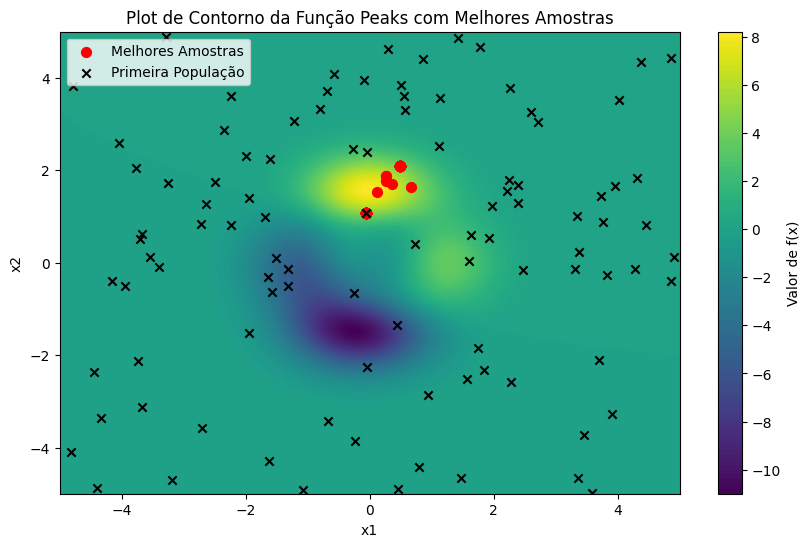

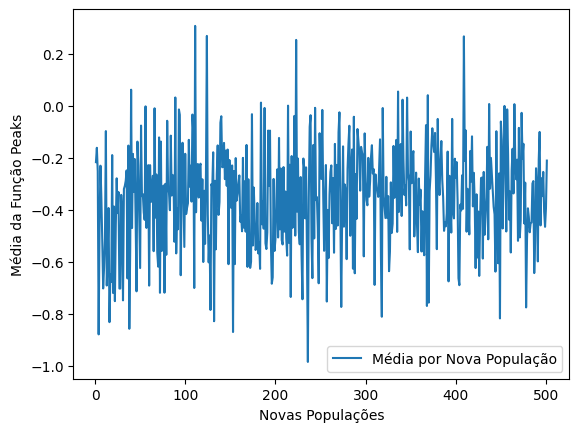

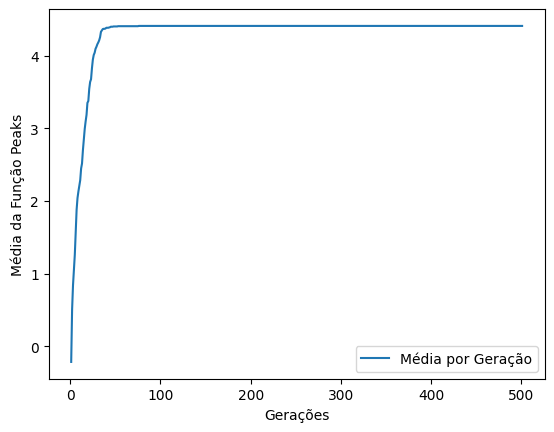

In [ ]:
main_prog(peaks, 'Peaks')

As observed, in the first graph above, the best individuals were concentrated in the region where the Peaks function takes a higher value, different from the original population (represented by the black X).
In the second graph it is possible to notice the noise caused when a new population is generated using the defined method, however when selecting the best individuals, it is notable that the population average grows a lot until reaching a value high enough to maintain almost constant (as seen in the third graph)


Rastrigin Case

[36.66554831884684, 35.01408232379877, 41.47924347054354, 43.94032374630713, 44.31132354279216, 48.2637965312494, 49.88215930622848, 49.541002905102324, 52.42338018087003, 49.989608120599634, 49.588477519351144, 51.69552424490537, 52.3776517608765, 51.09103249784894, 52.579660456640134, 53.76009301854554, 53.72245826344654, 51.5170365174792, 52.53539314049502, 51.776298632979014, 53.15068899571344, 50.70104009684335, 49.61993938892847, 52.600527218615824, 52.345202455288785, 53.932217140027085, 53.14744871673432, 51.16362761266847, 53.36107627564779, 52.17325501999912, 53.4818038369653, 53.799290147605554, 52.63281679623993, 50.562463415621366, 55.301733034477174, 51.87727007867291, 53.47738981228606, 51.84966732035584, 53.05221510000442, 52.89151110782132, 53.5774714426037, 49.95193563685224, 52.67679677625854, 50.18964652219597, 54.18074241881149, 52.48268960970517, 53.39176545416412, 51.649240747226465, 50.95215187259759, 53.215603724487316, 52.91235406435129, 51.22071948118419, 53.

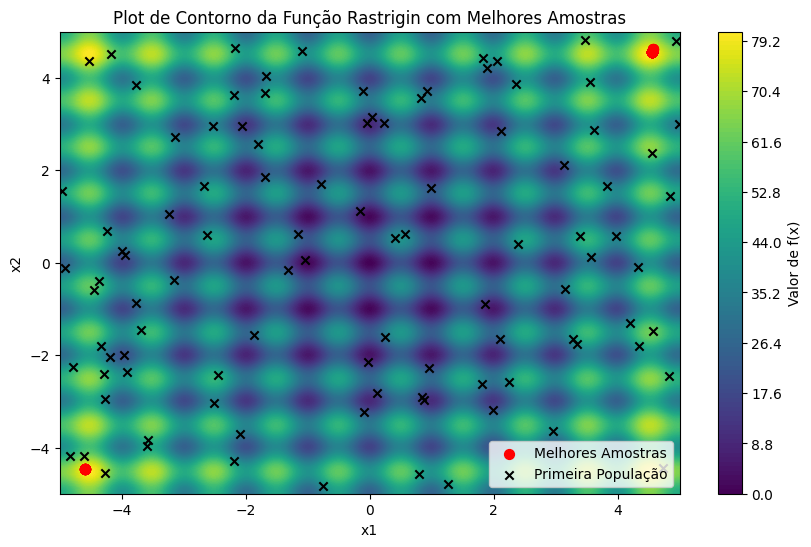

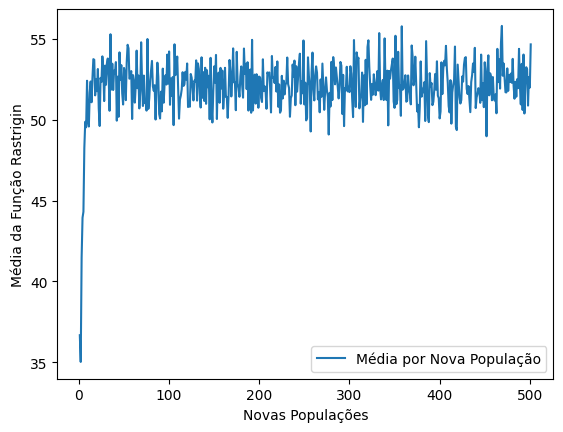

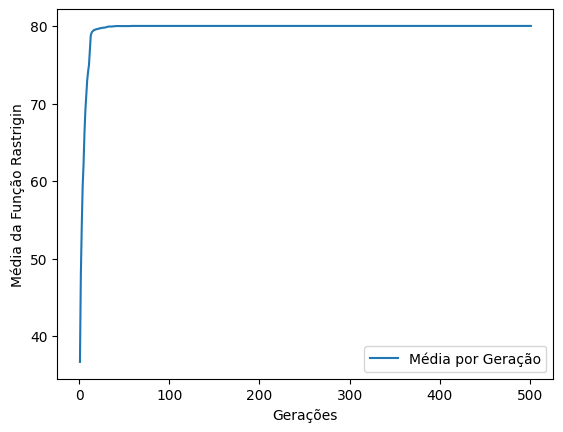

In [ ]:
main_prog(rastrigin, 'Rastrigin')

The same thing that happened in the Peaks case occurred in the Rastrigin case, in the first graph above, the best individuals were concentrated in the region where the Rastrigin function takes on a higher value, in this case the function takes on a higher value close to the margin of the worked space, different of the original population (represented by the black X).
In the second graph it is possible to notice an evolution followed by noise arising from the execution of the method, as in the Peaks case, however when selecting the best individuals, the population average grows until it reaches a sufficiently high value (as seen in the third graph)